In [10]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [11]:
X_orig = np.load('../../data/processed_data/specgram_db_pad_trunc.npy')

X_specaug1 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask1.npy')
X_tsh1 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift1.npy')
X_randn1 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise1.npy')
X_tstr1 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch1.npy')

X_specaug2 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask2.npy')
X_tsh2 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift2.npy')
X_randn2 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise2.npy')
X_tstr2 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch2.npy')

X_specaug3 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask3.npy')
X_tsh3 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift3.npy')
X_randn3 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise3.npy')
X_tstr3 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch3.npy')

print(X_orig.shape)

(440, 128, 67)


In [12]:
#choose what to add to the orignal data
X = np.concatenate((X_orig,X_specaug1), axis=0)
print(X.shape)

df = pd.read_csv("../../data/processed_data/metadata.csv")
df['breed'].unique()
category_to_number = {'european_shorthair': 0, 'maine_coon': 1}

# Create a new column with numerical values based on the mapping
df['numerical_breed'] = df['breed'].map(category_to_number)

y_orig = df['numerical_breed'].values
y = np.concatenate((y_orig, y_orig), axis=0)
print(y.shape)

(880, 128, 67)
(880,)


In [13]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(880, 128, 67, 1)


In [14]:
def plottv(history_dict,epochs):
    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()


    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)

    plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [16]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.0298 - accuracy: 0.4200 - val_loss: 93.8153 - val_accuracy: 0.5787
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 95.7448 - accuracy: 0.5736 - val_loss: 40.5174 - val_accuracy: 0.5787
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 41.3816 - accuracy: 0.5736 - val_loss: 8.0392 - val_accuracy: 0.5787
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 8.2369 - accuracy: 0.5736 - val_loss: 6.6502 - val_accuracy: 0.4213
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 6.4511 - accuracy: 0.4264 - val_loss: 3.2514 - val_accuracy: 0.4213
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 3.1342 - accuracy: 0.4264 - val_loss: 1.0745 - val_accuracy: 0.4213
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 1.0252 - accuracy: 0.4264 - val_loss: 0.6735 - val_accuracy: 0.5191
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 3s 3s/step - loss: 0.0753 - accuracy: 0.9723 - val_loss: 0.4294 - val_accuracy: 0.8894
Epoch 61/100
1/1 [==============================] - 4s 4s/step - loss: 0.0688 - accuracy: 0.9744 - val_loss: 0.4255 - val_accuracy: 0.8936
Epoch 62/100
1/1 [==============================] - 3s 3s/step - loss: 0.0602 - accuracy: 0.9808 - val_loss: 0.4378 - val_accuracy: 0.8851
Epoch 63/100
1/1 [==============================] - 4s 4s/step - loss: 0.0532 - accuracy: 0.9829 - val_loss: 0.4778 - val_accuracy: 0.8851
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.0521 - accuracy: 0.9829 - val_loss: 0.4945 - val_accuracy: 0.8851
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.0488 - accuracy: 0.9829 - val_loss: 0.4777 - val_accuracy: 0.8894
Epoch 66/100
1/1 [==============================] - 3s 3s/step - loss: 0.0419 - accuracy: 0.9851 - val_loss: 0.4668 - val_accuracy: 0.8936
Epoch 67/100
1/1 [=========

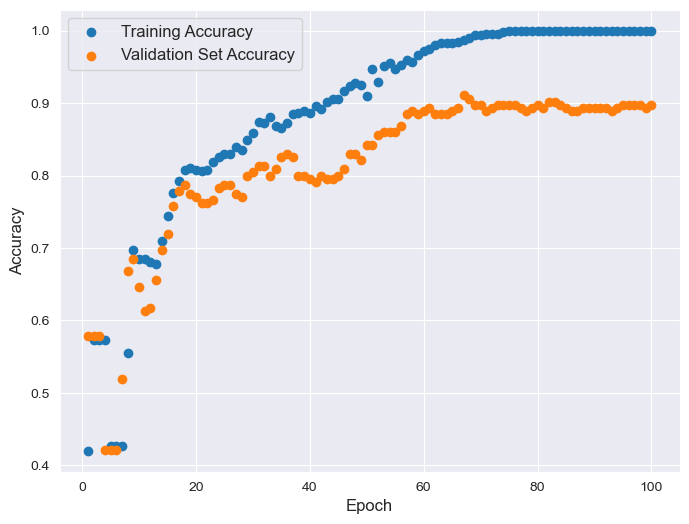

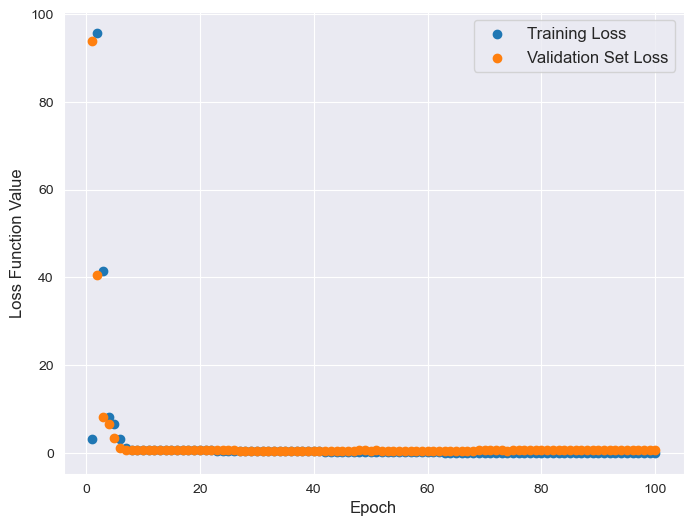

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 4.3989 - accuracy: 0.4307 - val_loss: 71.2396 - val_accuracy: 0.5872
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 73.3522 - accuracy: 0.5693 - val_loss: 33.9820 - val_accuracy: 0.5872
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 34.9520 - accuracy: 0.5693 - val_loss: 10.6918 - val_accuracy: 0.5872
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 10.9496 - accuracy: 0.5693 - val_loss: 1.4731 - val_accuracy: 0.5915
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 1.4840 - accuracy: 0.5714 - val_loss: 1.2503 - val_accuracy: 0.4128
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 1.2214 - accuracy: 0.4307 - val_loss: 0.7841 - val_accuracy: 0.4128
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.7762 - accuracy: 0.4328 - val_loss: 0.6558 - val_accuracy: 0.6085
Epoch 8/100
1/1 [===========

Epoch 60/100
1/1 [==============================] - 4s 4s/step - loss: 0.0900 - accuracy: 0.9765 - val_loss: 0.2091 - val_accuracy: 0.9106
Epoch 61/100
1/1 [==============================] - 4s 4s/step - loss: 0.0839 - accuracy: 0.9808 - val_loss: 0.2081 - val_accuracy: 0.9106
Epoch 62/100
1/1 [==============================] - 4s 4s/step - loss: 0.0778 - accuracy: 0.9829 - val_loss: 0.2184 - val_accuracy: 0.9149
Epoch 63/100
1/1 [==============================] - 4s 4s/step - loss: 0.0761 - accuracy: 0.9851 - val_loss: 0.2067 - val_accuracy: 0.9234
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.0692 - accuracy: 0.9872 - val_loss: 0.2061 - val_accuracy: 0.9191
Epoch 65/100
1/1 [==============================] - 4s 4s/step - loss: 0.0667 - accuracy: 0.9872 - val_loss: 0.2125 - val_accuracy: 0.9149
Epoch 66/100
1/1 [==============================] - 4s 4s/step - loss: 0.0638 - accuracy: 0.9893 - val_loss: 0.2105 - val_accuracy: 0.9191
Epoch 67/100
1/1 [=========

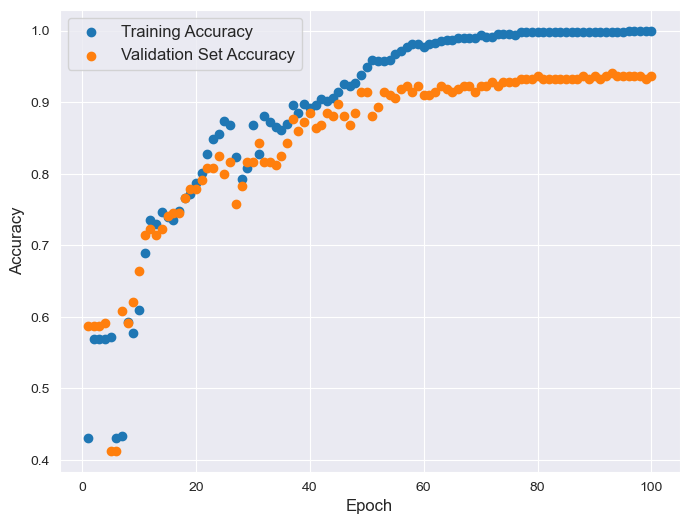

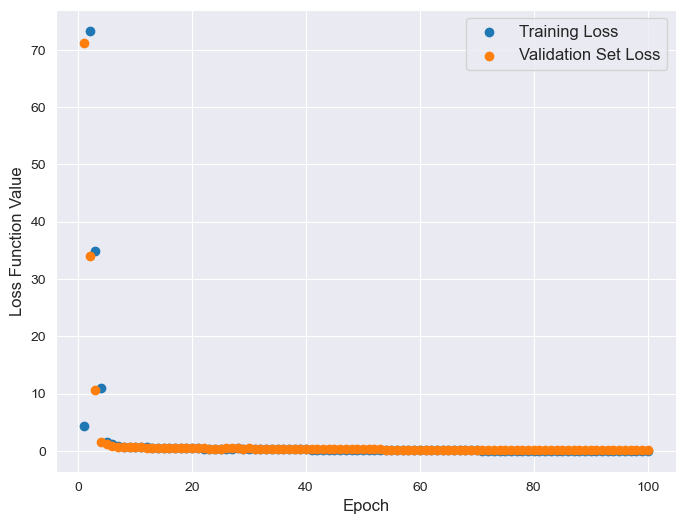

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 2.4463 - accuracy: 0.5830 - val_loss: 179.1224 - val_accuracy: 0.4402
Epoch 2/100
1/1 [==============================] - 4s 4s/step - loss: 185.6224 - accuracy: 0.4170 - val_loss: 58.5114 - val_accuracy: 0.4402
Epoch 3/100
1/1 [==============================] - 4s 4s/step - loss: 60.5971 - accuracy: 0.4170 - val_loss: 6.3079 - val_accuracy: 0.4402
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 6.4747 - accuracy: 0.4170 - val_loss: 0.6928 - val_accuracy: 0.5726
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 0.6929 - accuracy: 0.5894 - val_loss: 0.6930 - val_accuracy: 0.5598
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 0.6930 - accuracy: 0.5830 - val_loss: 0.6930 - val_accuracy: 0.5598
Epoch 7/100
1/1 [==============================] - 4s 4s/step - loss: 0.6928 - accuracy: 0.5851 - val_loss: 0.7436 - val_accuracy: 0.4444
Epoch 8/100
1/1 [===========

Epoch 60/100
1/1 [==============================] - 4s 4s/step - loss: 0.0791 - accuracy: 0.9723 - val_loss: 0.5016 - val_accuracy: 0.8761
Epoch 61/100
1/1 [==============================] - 4s 4s/step - loss: 0.0732 - accuracy: 0.9766 - val_loss: 0.5356 - val_accuracy: 0.8846
Epoch 62/100
1/1 [==============================] - 4s 4s/step - loss: 0.0677 - accuracy: 0.9787 - val_loss: 0.5350 - val_accuracy: 0.8846
Epoch 63/100
1/1 [==============================] - 3s 3s/step - loss: 0.0579 - accuracy: 0.9851 - val_loss: 0.5536 - val_accuracy: 0.8932
Epoch 64/100
1/1 [==============================] - 3s 3s/step - loss: 0.0566 - accuracy: 0.9830 - val_loss: 0.5528 - val_accuracy: 0.8932
Epoch 65/100
1/1 [==============================] - 4s 4s/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.5624 - val_accuracy: 0.8846
Epoch 66/100
1/1 [==============================] - 4s 4s/step - loss: 0.0437 - accuracy: 0.9915 - val_loss: 0.5408 - val_accuracy: 0.8974
Epoch 67/100
1/1 [=========

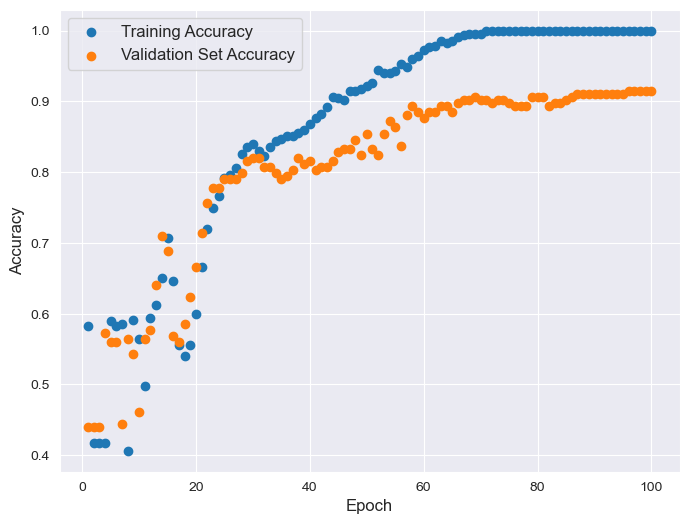

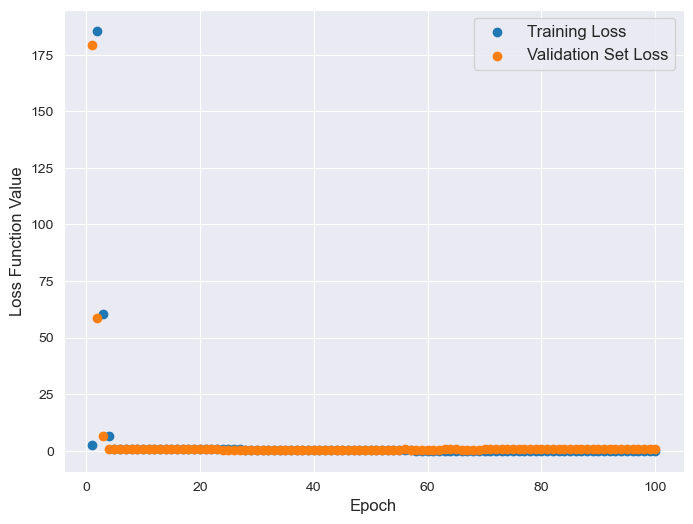

In [17]:
## Cross Validation folds
kfold = StratifiedKFold(3,
                        shuffle=True,
                        random_state=846)
epochs=100

for train_index, test_index in kfold.split(X_train,y_train):
    
    X_tt, X_val = X[train_index], X[test_index]
    y_tt, y_val = y[train_index], y[test_index]
    
    model = models.Sequential()
    model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
    model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
    model.add( layers.Conv2D(64, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    #model.add( layers.Conv2D(96, (6,4), activation='relu'))
    #model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
    model.add( layers.Flatten() )
    model.add(layers.Dense(45, activation='relu'))

    ## Finally an output layer
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_tt, 
                          to_categorical(y_tt), 
                          epochs=epochs, 
                          batch_size=int(len(y_tt)),
                          validation_data=(X_val,to_categorical(y_val)))
    history_dict = history.history
    plottv(history_dict,epochs)

In [18]:
epochs = 65 ##earlier stop, observed from Cross validation

model = models.Sequential()
model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
model.add( layers.Conv2D(64, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
model.add( layers.Conv2D(96, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
model.add( layers.Flatten() )
model.add(layers.Dense(45, activation='relu'))

## Finally an output layer
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, 
                    to_categorical(y_train), 
                    epochs=epochs, 
                    batch_size=len(y_train)
                    )
#history_dict = history.history
#plottv(history_dict,epochs)

Epoch 1/65
1/1 [==============================] - 13s 13s/step - loss: 0.7611 - accuracy: 0.5469
Epoch 2/65
1/1 [==============================] - 11s 11s/step - loss: 16.6010 - accuracy: 0.5724
Epoch 3/65
1/1 [==============================] - 12s 12s/step - loss: 2.0178 - accuracy: 0.4276
Epoch 4/65
1/1 [==============================] - 11s 11s/step - loss: 0.5589 - accuracy: 0.7145
Epoch 5/65
1/1 [==============================] - 12s 12s/step - loss: 1.1773 - accuracy: 0.6108
Epoch 6/65
1/1 [==============================] - 12s 12s/step - loss: 0.6812 - accuracy: 0.6861
Epoch 7/65
1/1 [==============================] - 13s 13s/step - loss: 0.5050 - accuracy: 0.7557
Epoch 8/65
1/1 [==============================] - 12s 12s/step - loss: 0.5684 - accuracy: 0.7045
Epoch 9/65
1/1 [==============================] - 12s 12s/step - loss: 0.6105 - accuracy: 0.6889
Epoch 10/65
1/1 [==============================] - 12s 12s/step - loss: 0.5864 - accuracy: 0.6974
Epoch 11/65
1/1 [===========

In [19]:
model.evaluate(X_test,to_categorical(y_test)) ##If want to use this predict new data, use model.predict() after loading the model



6/6 [==============================] - 0s 33ms/step - loss: 0.1616 - accuracy: 0.9375


[0.1616368144750595, 0.9375]

In [20]:
predictions = model.predict(X_test)

6/6 [==============================] - 0s 26ms/step


In [21]:
predicted_categ = np.argmax(predictions, axis=1)

# 'predicted_labels' now contains the predicted class indices for each sample
print(predicted_categ)

[0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0]


In [22]:
predicted_categ-y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [23]:
model.save("/Users/jinjingyi/meow/meow-by-meow/data/trained_models/CNN/CNN_dataaug_with_1freqtime_masking_breed.keras")